In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
data=fetch_california_housing()
x,y=data.data,data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
model=models.Sequential(
    [
        layers.Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
        layers.Dense(64,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(1)
    ]
)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history=model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1,validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae * 100000:.2f}')  # Convert to actual dollars

# Make a prediction
sample_input = np.expand_dims(x_test[0], axis=0)  # Take one test sample
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0] * 100000:.2f}')  # Convert to actual dollars


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1679 - mae: 0.7172 - val_loss: 0.4311 - val_mae: 0.5001
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3690 - mae: 0.4310 - val_loss: 0.4132 - val_mae: 0.4213
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3447 - mae: 0.4088 - val_loss: 0.3302 - val_mae: 0.4013
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3269 - mae: 0.3987 - val_loss: 0.3115 - val_mae: 0.3796
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3194 - mae: 0.3890 - val_loss: 0.3070 - val_mae: 0.3740
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3016 - mae: 0.3794 - val_loss: 0.3054 - val_mae: 0.3863
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3132 - mae: 0.3852 - val_loss: 0.2927 - val_mae: 0.3719
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2896 - mae: 0.3723 - val_loss: 0.2993 - val_mae: 0.3766
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

Test MAE: $35090.05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted House Price: $45020.06


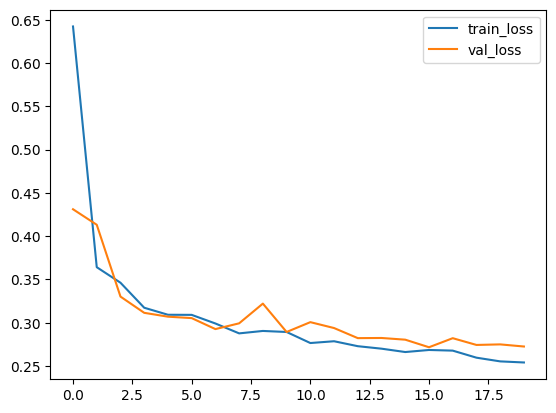

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [15]:
# Example 2 - House Price Prediction (Regression) with Synthetic dataset and Normalization

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset (1000 samples, 10 features) in [0,1] range
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000)  # Target values in range 0-1

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200)  # Targets in range 0-1

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history=model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1,validation_split=0.2)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE (Normalized): {test_mae:.4f}')

# Make a prediction
sample_input = np.random.rand(1, 10)  # In [0,1] range
predicted_value = model.predict(sample_input)
print(f'Predicted Value (Normalized): {predicted_value[0][0]:.4f}')

# This is again a bad model because we are still training on random values (just normalised values)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.6897 - mae: 0.7265 - val_loss: 0.1343 - val_mae: 0.3051
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1131 - mae: 0.2762 - val_loss: 0.1047 - val_mae: 0.2775
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0914 - mae: 0.2565 - val_loss: 0.1008 - val_mae: 0.2717
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0868 - mae: 0.2494 - val_loss: 0.0975 - val_mae: 0.2682
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0854 - mae: 0.2477 - val_loss: 0.0952 - val_mae: 0.2646
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0829 - mae: 0.2468 - val_loss: 0.0930 - val_mae: 0.2620
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0819 - mae: 0.2453 - val_loss: 0.0931 - val_mae: 0.2597
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0823 - mae: 0.2468 - val_loss: 0.0918 - val_mae: 0.2582
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0762 - mae: 0.2359 - v

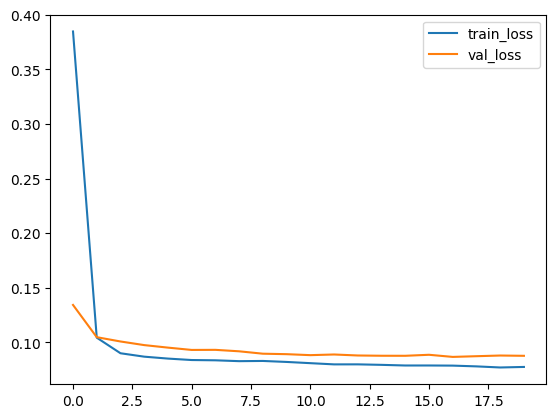

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
